## Classification - Decision Tree
"""
Created on Wed Aug 26 18:24:06 2020

@author: LOVE ARORA
"""

## Loding the dataset

In [ ]:
# Load libraries
import pandas as pd

#Loading Data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("dataset/diabetes.csv", header=0, names=col_names)

pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [ ]:
pima.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
pima.shape

(768, 9)

In [ ]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [ ]:
pima.head()
pima.columns
pima.values
pima.shape
pima.describe()
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

## Data Visualization

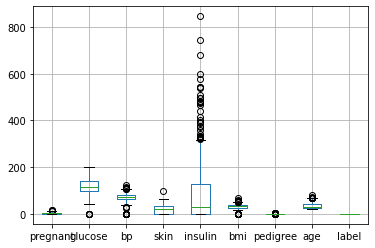

In [ ]:
pima.boxplot()

<AxesSubplot:title={'center':'label'}>

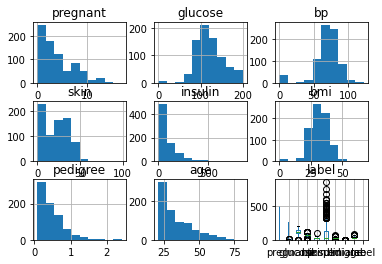

In [ ]:
#Visualizing Data
#histogram
pima.hist()
#boxplot
pima.boxplot()

## Feature Selection

In [ ]:
#Feature Selection :  divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
print(X)

y = pima.label # Target variable
print(y)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


## Splitting Data Set -> Training Data Set + Test Data Set

In [ ]:
#Splitting Data
# Import train_test_split function
from sklearn.model_selection import train_test_split
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train
y_train

X_test
y_test

NameError: name 'X' is not defined

In [ ]:
X_train.describe()

NameError: name 'X_train' is not defined

In [ ]:
X_test.describe()

NameError: name 'X_test' is not defined

In [ ]:
y_train.describe()

NameError: name 'y_train' is not defined

## Create Decision Tree Classification

In [ ]:
#Building Decision Tree Model
# Import Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_test)

print(y_pred)

NameError: name 'X_train' is not defined

## Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       146
           1       0.59      0.52      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

## Decision Tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf,feature_names = feature_cols,class_names=['0','1'],
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig("output/decisiontree.png")
#check output in output folder

NameError: name 'feature_cols' is not defined

<Figure size 1800x720 with 0 Axes>

## Optimize the Model

In [ ]:
#Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  22]
 [ 31  54]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[124  22]
 [ 31  54]]


## Optimized Decision Tree

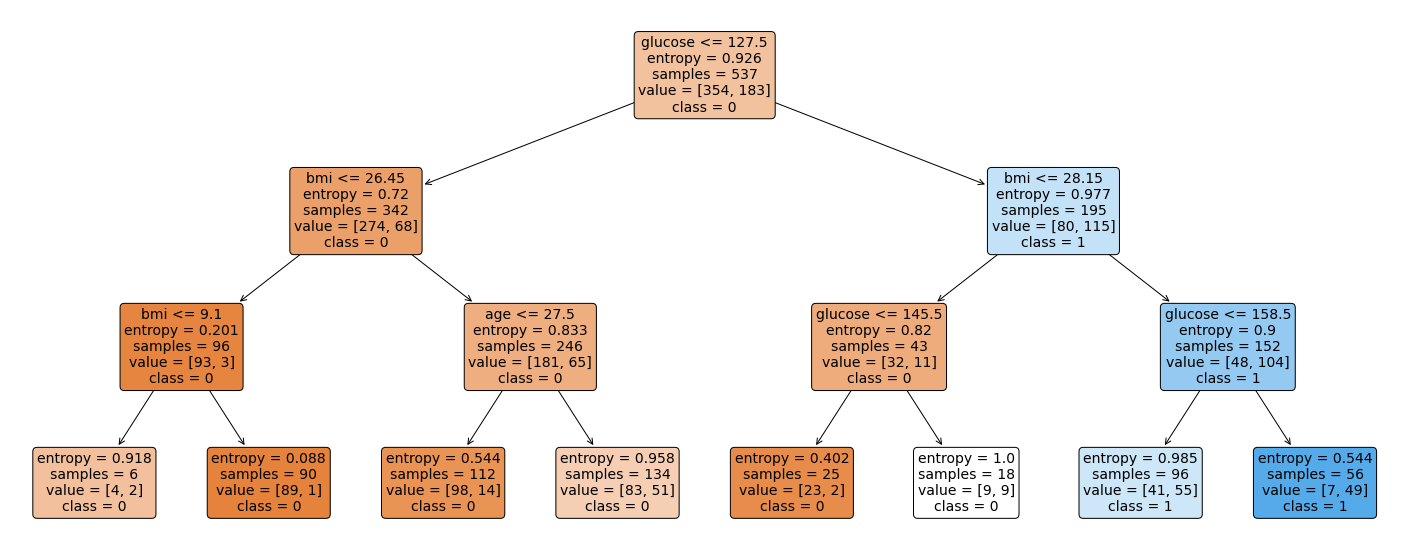

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(clf1,feature_names = feature_cols,class_names=['0','1'],
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig("output/decisiontree_optimized.png")
#check output in output folder

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=486c3042-68b8-438c-a156-48d94106b4cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>